# 09wk-1: 마코프체인 (6)

최규빈  
2023-04-27

# 강의영상

> youtube:
> <https://youtube.com/playlist?list=PLQqh36zP38-xbWjXgaQNqqqZDzuV1QsgL>

# imports

In [1]:
import numpy as np 

# aperiodic

## Motivating Examples (cont)

### 예제3

`-` 아래의 전이확률을 고려하자.

In [316]:
P =np.array([0.0, 1.0, 0.0, 0.0, 
             1/2, 0.0, 1/2, 0.0,
             0.0, 0.0, 0.0, 1.0,
             0.0, 1.0, 0.0, 0.0]).reshape(4,4)
P

`-` 다이어그램

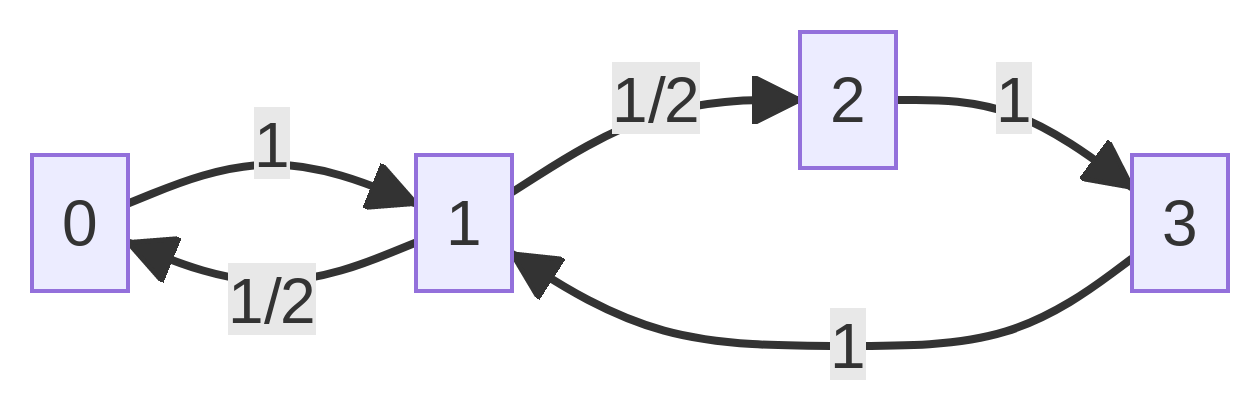

`-` 특징1,2:

In [323]:
np.matrix(P)**500

`-` 특징3: 정상분포를 가짐

`-` 특징4: 초기분포가 정상분포라면 정상확률과정

`-` 특징5: irr

`-` 특징6: 주기가 없음

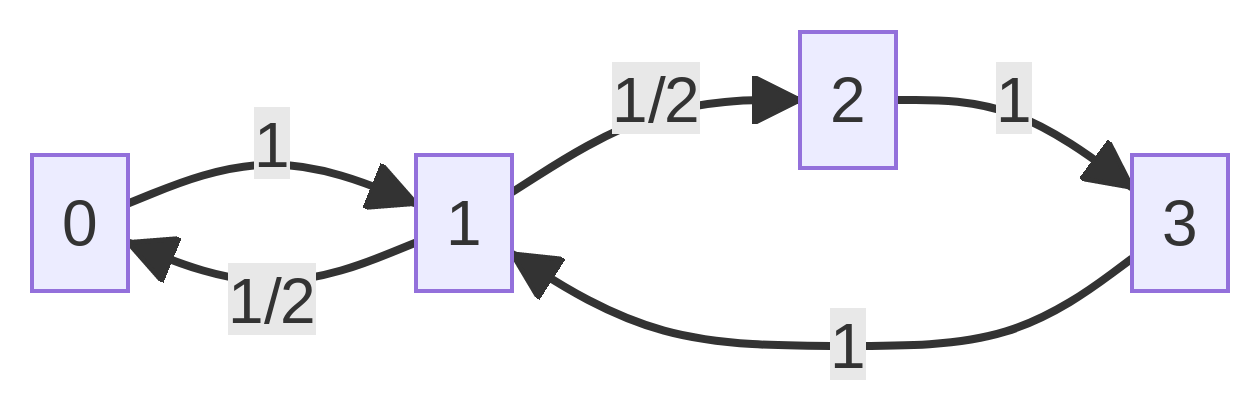

**1에서 시작한다면?**

-   $1 \to 0 \to 1$, 2번만에 리턴
-   $1 \to 2 \to 3 \to 1$, 3번만에 리턴

이 경우 2와 3의 최대공약수는 1이므로 주기는 1이다. 그리고 finite state
space를 가지는 HMC는 모든 state가 항상 같은 주기를 가지므로 이
마코프체인의 모든 주기는 1이다.

> 주기가 1인 경우는 aperiodic 하다고 표현한다. (언제 올지 몰라)

> 꿀팁: 자기자신으로 1턴만에 되돌아올 확률이 있다면 항상 aperiodic 하다.

## 정의 및 이론

`-` 정의:

`-` 느낌: 상태 $i$에서 $i$로 되돌아오는 횟수들의 최대공약수를 HMC
$\{X_t\}$의 period라고 하고, period=1인 경우를 aperiodic 이라고 한다.

`-` **이론**: HMC $\{X_t\}$이 IRR이면, 모든 상태가 항상 같은 주기를
가진다.

# 에르고딕 마코프체인

## 정의 및 이론

`-` **Thm**: HMC $\{X_t\}$가 (1) finite state space를 가지고 (2)
irreduciable 하고 (3) aperiodic 이라면, ${\bf P}$가 수렴하고 수렴한
matrix의 모든 row는 같다. 따라서 임의의 초기분포 ${\boldsymbol \mu}$ 에
대하여

$$\lim_{t\to \infty}{\boldsymbol \mu}^\top{\bf P}^t = {\boldsymbol \pi}^\top $$

이 성립한다. 여기에서 ${\boldsymbol \pi}$는 $\{X_t\}$의 정상분포이다.

`-` 정의: 아래의 식을 만족하는 HMC $\{X_t\}$을 에르고딕하다고 말한다.

$$\lim_{t\to \infty}{\boldsymbol \mu}^\top{\bf P}^t = {\boldsymbol \pi}^\top $$

# 구글의 페이지랭크

## intro

`-` Google

-   Google은 사용자의 검색어와 일치하는 검색 결과를 제공
-   Google은 웹사이트들 사이에서 “더 나은” 또는 “더 중요한” 웹사이트가
    검색 결과 상위에 나타나도록 순위를 유지
-   이 순위는 전체 문제를 한 번에 해결하는 것이 아니라 먼저 전체적으로
    수립되고(검색어와는 독립적으로), 그 후에 검색어와 일치하는
    웹사이트들만 해당 순위에 따라 정렬된다고 함

`-` 이 강의에서는 순위 매기기에 초점을 맞추어 생각해보자. (이는
마코프체인과 관련이 있음)

-   ref: <https://en.wikipedia.org/wiki/PageRank>

`-` 페이지랭크

-   페이지랭크(PageRank)는 구글 검색에서 웹 페이지의 순위를 결정하는
    알고리즘으로 이는 “웹 페이지”와 구글 공동 창업자인 라리 페이지(Larry
    Page)의 이름을 따서 지어졌음
-   페이지랭크는 웹사이트 페이지의 중요성을 측정하는 방법이며 기본적으로
    더 중요한 웹사이일수록 다른 웹사이트에서 더 많은 링크를 받을
    가능성이 높다는 점에 착안함
-   페이지랭크는 구글이 검색 결과를 정렬하는 데 사용하는 유일한
    알고리즘이 아니지만, 구글에서 사용한 최초의 알고리즘이며, 가장 잘
    알려진 알고리즘임

## toy example

`-` 아래는 7개의 website에 대한 web graph이다.

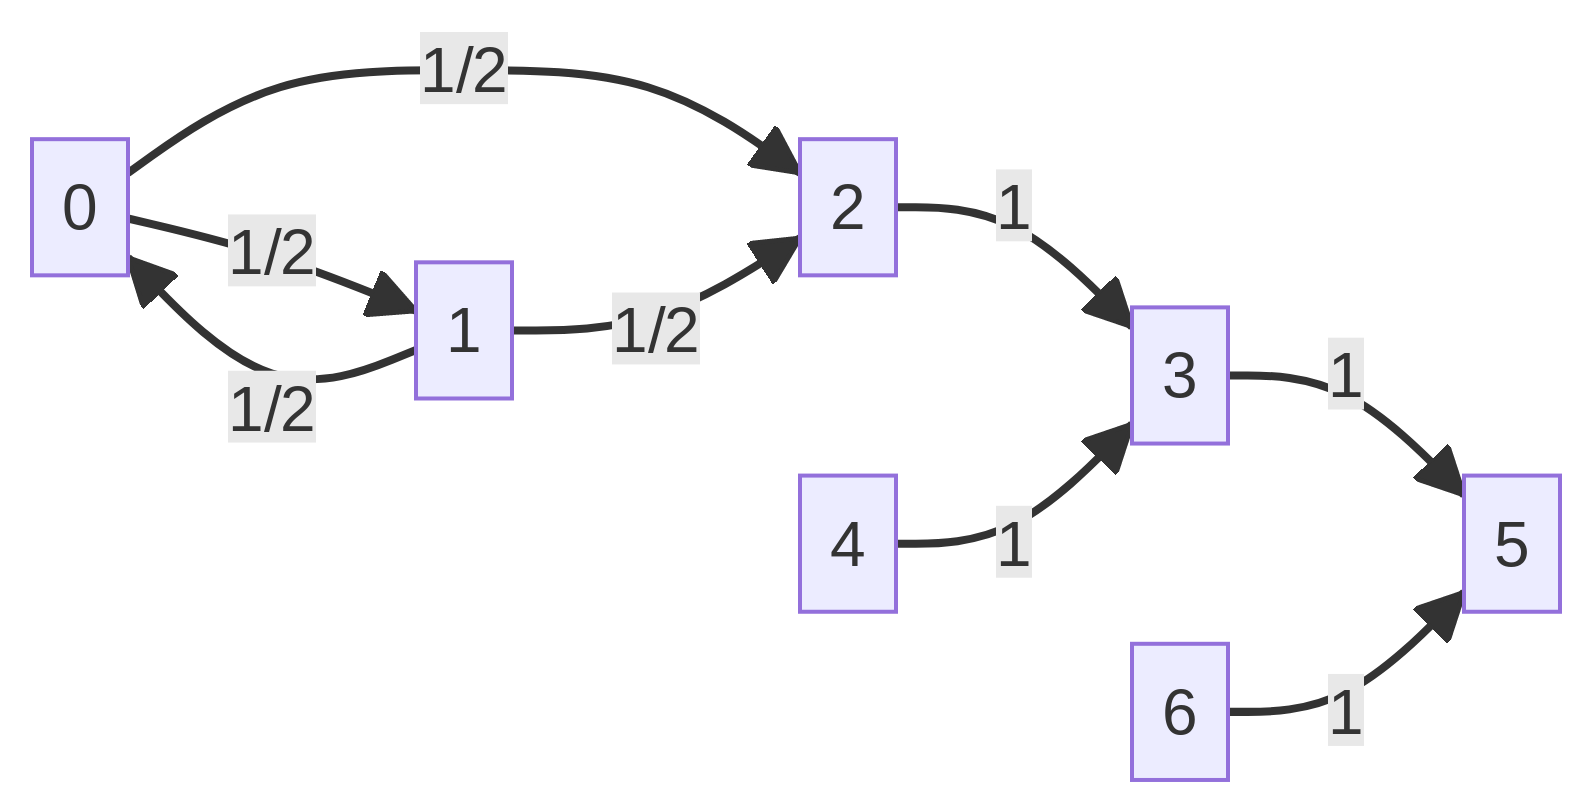

`-` 여기에서 가장 중요한 웹사이트는 무엇일까?

-   구글의 아이디어는 기본적으로 **더 많은 화살표를 받는 쪽이 더 중요한
    웹사이트이다** 라는 것이었다.
-   이 논리대로라면 노드 2,3,5가 똑같이 중요해보인다.
-   좀 더 생각해보니까 노드2보다 노드3과 노드5가 더 중요해보인다.
    왜냐하면 노드2는 확률 1/2 짜리 화살표 2개이지만 노드3과 노드5는 확률
    1짜리 화살표가 2개임
-   그렇지만 또 노드3보다는 노드5가 더 중요해보인다. 왜냐하면 노드3을
    방문한 사람은 결국은 노드5로 갈테니까 노드3보다 노드5가 더 중요한
    사이트라고 볼 수 있다.
-   그럼 노드3의 중요도가 1일때 노드5의 중요도는 얼마정도 될까?

`-` 구글의 아이디어: **random surfer**

-   무작위로 웹사이트를 방문하는 가상의 유저를 만들자.
-   그리고 이 유저가 많이 방문하게 되는 웹사이트를 기록하자.

`-` 구글의 아이디어는 결국 위의 다이어그램을 토대로 transition matrix
${\bf P}$를 만들고 임의의 초기상태 ${\boldsymbol \mu}$에 대하여

$$\lim_{t\to\infty}{\boldsymbol \mu}^\top{\bf P}^{t}$$

를 계산하겠다는 의미이다.

`-` 문제점1: 이 상황은 transition matrix를 만들 수 없는걸?

In [232]:
P = np.array([0.0, 1/2, 1/2, 0.0, 0.0, 0.0, 0.0,
              1/2, 0.0, 1/2, 0.0, 0.0, 0.0, 0.0,
              0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,
              0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
              0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,
              0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ### 이 부분은 다 0이다. 
              0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]).reshape(7,7)
P

`-` 문제점1의 해결: 이러한 경우 상태5에서 다른상태로 갈 확률은 랜덤으로
다시 뿌린다.

In [236]:
P = np.array([0.0, 1/2, 1/2, 0.0, 0.0, 0.0, 0.0,
              1/2, 0.0, 1/2, 0.0, 0.0, 0.0, 0.0,
              0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,
              0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
              0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,
              1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7, ### 이렇게 고쳐버리자~
              0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]).reshape(7,7)
P

`-` 문제점2: $\lim_{t\to\infty}{\boldsymbol \mu}^\top{\bf P}^{t}$이게
수렴한다는 보장이 어디있지?

## 수렴의 트릭

`-` 생각: HMC $\{X_t\}$가 에르고딕이려면 (1) finite state space를 가지고
(2) irreducible (3) aperiodic 해야한다.

`-` 그런데 (N,N) 차원을 가지는 임의의 transition matrix ${\bf P}$를
아래와 같이 $\tilde{\bf P}$로 변형한다면 이 transition matrix는
aperiodic하고 irreducible하게 된다.

$$\tilde{\bf P} = 0.99 \cdot {\bf P} + 0.01 \cdot \frac{1}{N}{\bf J}$$

여기에서 ${\bf J}$는 ${\bf P}$와 차원이 같고 모든 원소가 1인
매트릭스이다. 즉

$${\bf J} = \begin{bmatrix} 1 & 1 & \dots & 1 \\ 1 & 1 & \dots & 1 \\ \dots & \dots & \dots & \dots \\ 1 & 1 & \dots & 1 \end{bmatrix}$$

이다.

`-` 위의 수식에서 $\tilde{\bf P}$는 ${\bf P}$와 매우 비슷하지만
에르고딕한 마코프체인이다.

`-` 이러한 $\tilde{\bf P}$를 구글매트릭스라고 부르자. 위의 식을 좀 더
간결하게 쓰면

$${\bf GoogleMatrix}:= \alpha\cdot {\bf P} + (1-\alpha)\cdot\frac{1}{N}{\bf J}$$

와 같이 된다. 여기에서 $\alpha \in (0,1)$ 이다.

`-` 여기에서 $\alpha$는 수렴의 속도를 결정한다.

-   ${\bf P}$가 원래 수렴안하는 조건이었다면 $\alpha \approx 1$ 일수록
    구글매트릭스는 매우 느리게 수렴할 것이다.
-   $\alpha=0$ 이라면 구글매트릭스는 이미 수렴되어 있다.

## 구현

In [326]:
P = np.array([0.0, 1/2, 1/2, 0.0, 0.0, 0.0, 0.0,
              1/2, 0.0, 1/2, 0.0, 0.0, 0.0, 0.0,
              0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,
              0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
              0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,
              1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7,
              0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]).reshape(7,7)
P

In [338]:
alpha= 0.85 
J = np.ones(49).reshape(7,7)
GoogleMatrix = alpha*P + (1-alpha)/7 

In [344]:
np.linalg.matrix_power(GoogleMatrix,100)[0].round(3).tolist()

In [348]:
import pandas as pd 
pd.DataFrame({'website':['state'+i for i in '0123456'], 
             'pagerank': np.linalg.matrix_power(GoogleMatrix,100)[0].round(3).tolist()})

## 다른풀이

In [352]:
_, eigen_vector_matrix = np.linalg.eig(GoogleMatrix.T)

In [358]:
abs(eigen_vector_matrix[:,0])/ abs(eigen_vector_matrix[:,0]).sum()

## 페이지랭크의 약점

`-` 아래와 같은 상황을 고려하자.

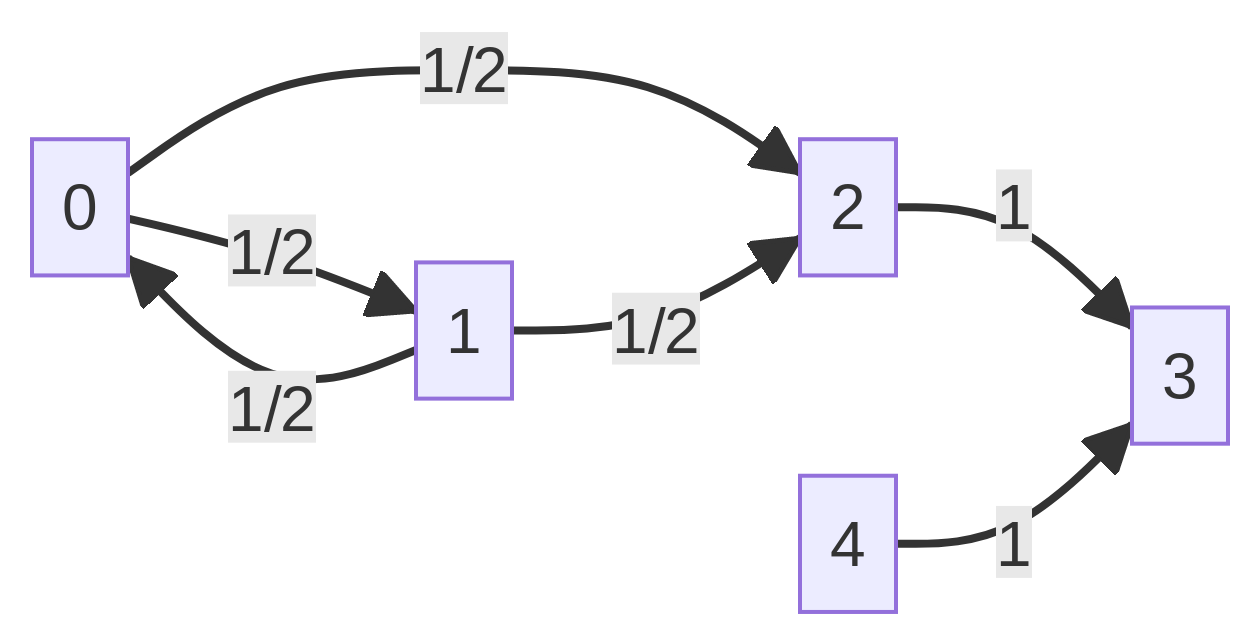

In [360]:
P = np.arrfffq/5, 1/5,
              0.0, 0.0, 0.0, 1.0, 0.0]).reshape(5,5)
P

In [362]:
GoogleMatrix = P*0.85 + 0.15/5 

In [364]:
np.linalg.matrix_power(GoogleMatrix,100)

`-` 우리는 여기에서 1번네트워크의 page rank를 올리고 싶다고 가정하자.
(현재는 5개중 0.15936255)

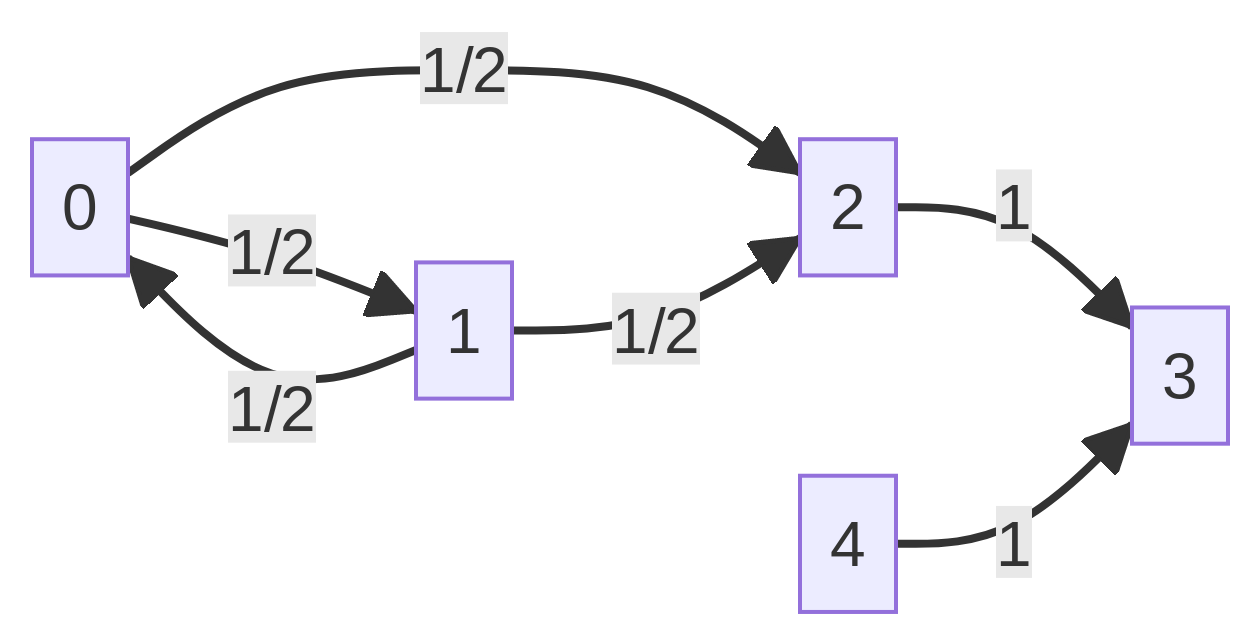

**Step1:** 먼저 1번에서 다른쪽으로 가는 모든 링크를 끊는다. (다른
웹사이트의 page rank를 올려줄 이유가 없음)

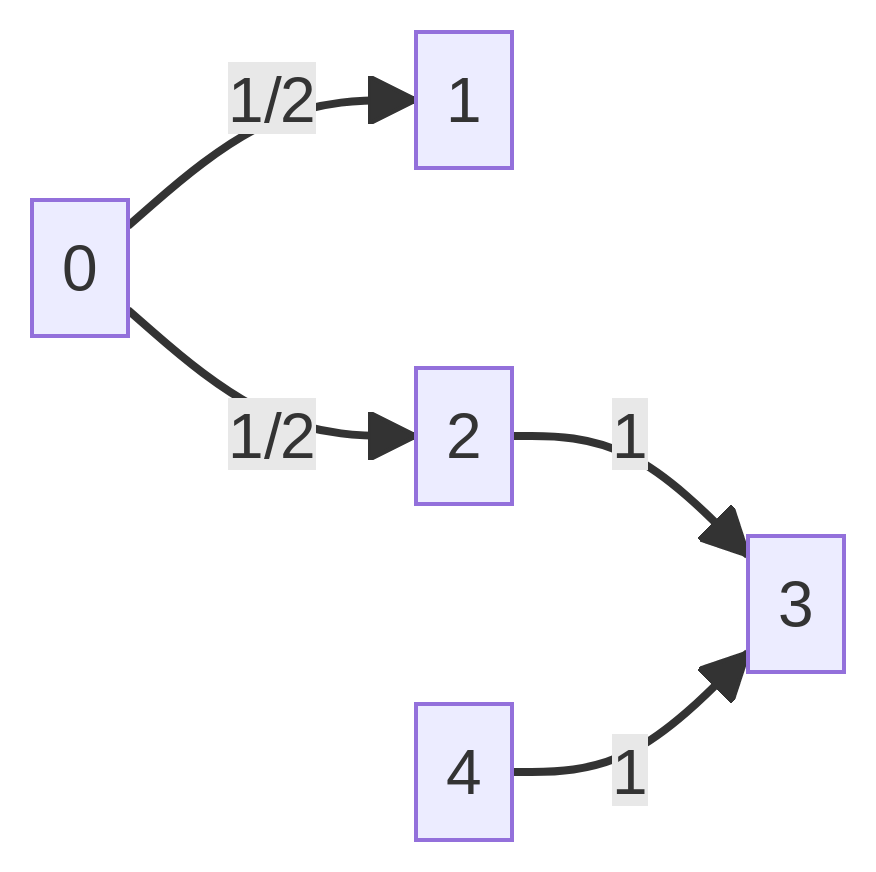

In [365]:
P = np.array([0.0, 1/2, 1/2, 0.0, 0.0,
              1/5, 1/5, 1/5, 1/5, 1/5,
              0.0, 0.0, 0.0, 1.0, 0.0,
              1/5, 1/5, 1/5, 1/5, 1/5,
              0.0, 0.0, 0.0, 1.0, 0.0]).reshape(5,5)

In [367]:
GoogleMatrix = P*0.85 + 0.15/5 
np.linalg.matrix_power(GoogleMatrix,100)

**Step2:** 3개의 더미사이트 5,6,7을 만들어서 1번네트워크와 서로
연결시킨다.

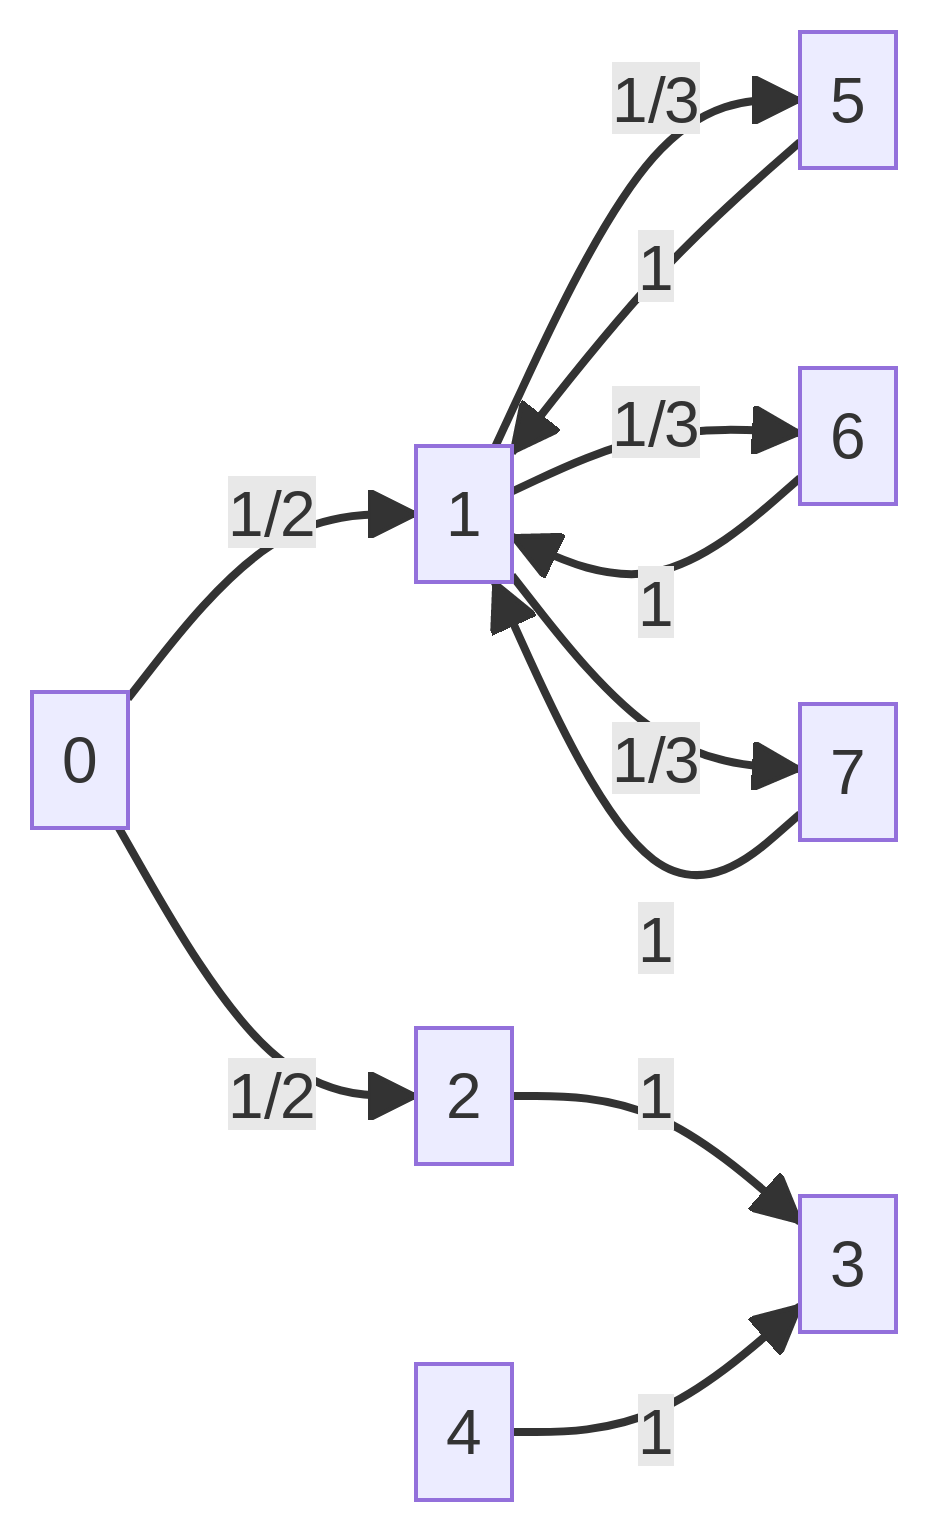

In [368]:
P = np.array([0.0, 1/2, 1/2, 0.0, 0.0, 0.0, 0.0, 0.0,
              0.0, 0.0, 0.0, 0.0, 0.0, 1/3, 1/3, 1/3,
              0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,
              1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8,
              0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,
              0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
              0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
              0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]).reshape(8,8)

In [374]:
GoogleMatrix = P*0.85 + 0.15/8
pagerank =np.linalg.matrix_power(GoogleMatrix,100)[0]
pagerank

In [373]:
website = ['state'+i for i in '01234567']
website

In [375]:
pd.DataFrame({'pagerank':pagerank,'website':website})

`-` 약점을 극복한 구글의 아이디어: 저도 몰라용..